**Operations Research in Action &#x25aa; Fall 2024**

# Project 1 &ndash; Results

## Our final model

- Let's dig deeper into the regression model we settled on (Model 5), with
    - log(BeerConsumption) as the response variable, and
    - AvgBeerPrice, AvgCannedSoftDrinkPrice, RamadanDays, Year, Month as the explanatory variables.

- Let's load `olsrr` so we can recompute the VIFs.

In [1]:
library(olsrr)


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




- Load the data:

In [2]:
all_df <- read.csv('data/all.csv')

- Recall that we redefined `Month` in order to explicitly tell R the order of the categorical variable.

- We also need to compute log(BeerConsumption). 

In [3]:
all_df$Month <- factor(
    all_df$Month, 
    levels = c('January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December')
) 

all_df$logBeerConsumption <- log(all_df$BeerConsumption)

- Now we can recompute the fitted model: 

In [4]:
best5_logfit <- lm(
    logBeerConsumption
    ~
    AvgBeerPrice
    + AvgCannedSoftDrinkPrice
    + RamadanDays
    + Year
    + Month,
    data = all_df 
)

summary(best5_logfit)


Call:
lm(formula = logBeerConsumption ~ AvgBeerPrice + AvgCannedSoftDrinkPrice + 
    RamadanDays + Year + Month, data = all_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.212113 -0.052371 -0.001813  0.053253  0.156207 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.567e+02  1.200e+01 -21.386  < 2e-16 ***
AvgBeerPrice            -4.977e-04  1.196e-04  -4.162 9.08e-05 ***
AvgCannedSoftDrinkPrice  1.747e-04  6.572e-05   2.658  0.00979 ** 
RamadanDays             -1.446e-02  1.808e-03  -7.997 2.22e-11 ***
Year                     1.375e-01  5.971e-03  23.030  < 2e-16 ***
MonthFebruary            4.102e-02  4.367e-02   0.939  0.35082    
MonthMarch               3.540e-01  4.684e-02   7.557 1.39e-10 ***
MonthApril               2.796e-01  4.861e-02   5.751 2.30e-07 ***
MonthMay                 5.993e-01  4.540e-02  13.200  < 2e-16 ***
MonthJune                7.858e-01  4.427e-02  17.749  < 2e-16 ***
Mont

- Let's recreate the diagnostic plots:

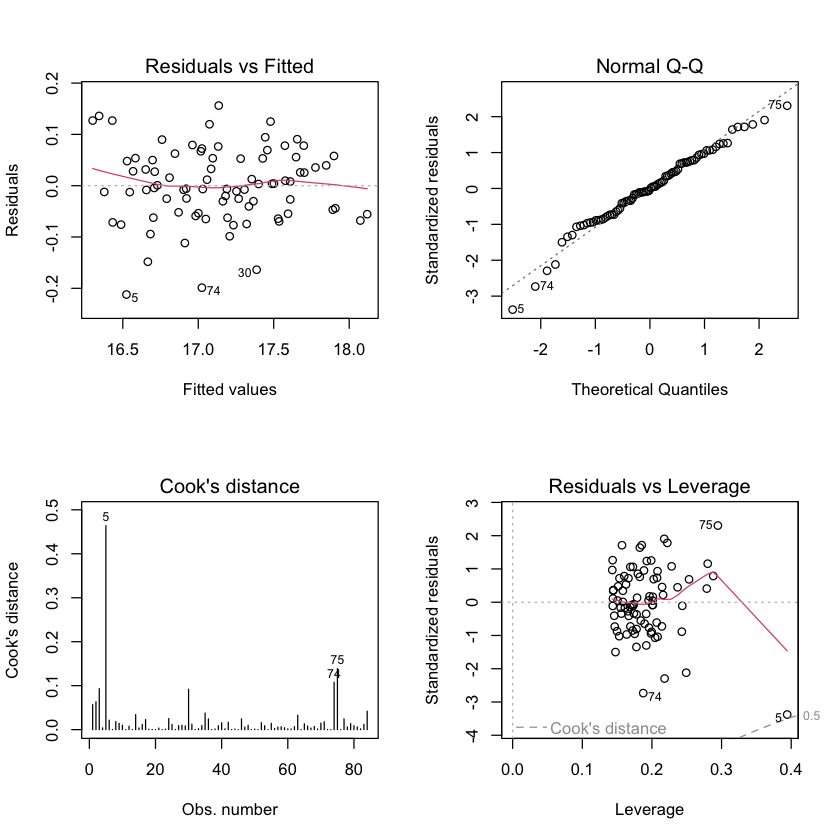

In [5]:
par(mfrow=c(2, 2))
plot(best5_logfit, which=1)
plot(best5_logfit, which=2)
plot(best5_logfit, which=4)
plot(best5_logfit, which=5)

- Finally, let's recompute the VIFs.

In [6]:
ols_vif_tol(best5_logfit)

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
AvgBeerPrice,0.7035491,1.421365
AvgCannedSoftDrinkPrice,0.4621086,2.163994
RamadanDays,0.5450715,1.834622
Year,0.5438136,1.838866
MonthFebruary,0.5323949,1.878305
MonthMarch,0.4627657,2.160921
MonthApril,0.4297176,2.327110
MonthMay,0.4924821,2.030531
MonthJune,0.5180137,1.930451


## Diagnostics

- Comment on whether the conditions for linear regression have been met. Focus on linearity, equal variance, and normality.

_Write your notes here. Double-click to edit._

_Solution._
Linearity seems reasonably satisfed, since the residuals versus fitted plot shows little curvature, with the points roughly evenly distributed above and below the zero residual line, moving from left to right. Equal variance also seems reasonably satisfied, since the points in the residuals versus fitted plot span a relatively constant vertical width, moving from left to right. Finally, normality also seems reasonably satisfied, since the normal QQ plot of the residuals is mostly linear. 

- Comment on whether there are any problematic observations that may distort the outcome and accuracy of the regression.

_Write your notes here. Double-click to edit._

_Solution._
There do not appear to be any problematic observations that may distort the outcome and accuracy of the regression: for all observations, the Cook's distance is below 0.5.

- Comment on whether the predictors in the model exhibit multicollinearity.

_Write your notes here. Double-click to edit._

_Solution._
Multicollinearity does not appear to be an issue, since the variance inflation factors for all of the predictors are relatively small (VIFs < 5).

## Statistical significance 

- Comment on the effectiveness of the predictors in this model. 

_Write your notes here. Double-click to edit._

_Solution._
The t-tests for the coefficients indicate that each of the predictors in our model is significantly associated with monthly beer consumption (p-values < 0.01), except for the month of February. 

- Comment on the overall effectiveness of the model.

_Write your notes here. Double-click to edit._

_Solution._
Furthermore, the F-test provides strong evidence that the overall model is effective (p-value $\approx$ 0).
97.32\% of the variability in monthly beer consumption can be explained by the predictors in our model.

## Interpretation

- Interpret the relationship between monthly beer consumption and each of the following variables: average beer price, average canned soft drink price, number of Ramadan days in a month. 

_Write your notes here. Double-click to edit._

In [7]:
# Solution
exp(50 * -4.977e-04)

[1] 0.9754221

In [8]:
# Solution
exp(50 * 1.747e-04)

[1] 1.008773

In [9]:
# Solution
exp(-1.446e-02)

[1] 0.985644

_Solution._
Our model indicates that on average, increasing the average beer price by 50 lira is associated with a 2.5% decrease in monthly beer consumption, while increasing the average canned soft drink price by 50 lira is associated with an 0.8% increase in monthly beer consumption, holding all other variables constant. An additional day of Ramadan in a particular month is associated with a 1.5% expected decrease in monthly beer consumption.

- Interpret the relationship between the month of August and monthly beer consumption.

_Write your notes here. Double-click to edit._

In [10]:
# Solution
exp(9.922e-01)

[1] 2.697162

_Solution._
Our model also indicates the summer months are associated with higher monthly beer consumption. For example, according to our model, on average, monthly beer consumption is 2.7 times higher in August than in January. 

- Show how the model can be used to predict a hypothetical scenario. Provide a prediction interval. 

_Write your notes here. Double-click to edit._

In [11]:
# Solution
fit_predict <- predict(
    best5_logfit, 
    newdata=data.frame(
        AvgBeerPrice=1200,
        AvgCannedSoftDrinkPrice=1600,
        RamadanDays=0,
        Year=1994,
        Month="August"
    ), 
    interval="prediction", 
    level=0.95
)

fit_predict
exp(fit_predict)

,fit,lwr,upr
1,18.21768,18.04003,18.39533


,fit,lwr,upr
1,81627838,68341961,97496529


_Solution_.
By plugging values into our fitted model, we can predict monthly beer consumption, depending on the average beer price, average canned soft drink price, the number of Ramadan days in the month, the year, and the month. For example, consider a hypothetical August 1994, when the average beer price is 1200 lira and the average canned soft drink price is 1600 lira (since it is August, it is not Ramadan). Our model predicts a monthly beer consumption of 81,627,838 liters. Furthermore, we are 95% confident that the monthly beer consumption is between 68,341,961 and 97,496,529 liters.   